<a href="https://colab.research.google.com/github/i-saw/notebooks/blob/main/%D0%A1%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D1%80%D0%B0%D0%B7%D0%BD%D1%8B%D1%85_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Установка

In [1]:
# Установка Tesseract OCR
from IPython.display import clear_output
!apt-get update
!apt-get install -y tesseract-ocr
!pip install pytesseract pillow
clear_output()

In [2]:
# Установка easy OCR
%%capture
%pip -q install easyocr
%pip -q install pdf2image
%pip install git+https://github.com/JaidedAI/EasyOCR.git
%pip install pyspellchecker
!apt-get install poppler-utils
!rm -r sample_data
clear_output()

In [3]:
# Установка PaddleOCR
!pip install paddlepaddle
!pip install paddleocr
!pip install matplotlib
clear_output()

In [4]:
# Установка ultralytics для YOLO
!pip install ultralytics
clear_output()

# Импорты

In [5]:
# Импорт необходимых библиотек PyTesseract
import pytesseract
# from PIL import Image
import requests
from io import BytesIO
# import cv2
# import matplotlib.pyplot as plt
# import numpy as np
# from google.colab import files
# Указываем путь к исполняемому файлу tesseract
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'
clear_output()

In [6]:
# Импорт необходимых библиотек easy OCR
import gdown
import easyocr
# import cv2
# import matplotlib.pyplot as plt
# import numpy as np
# from google.colab import files
# from PIL import Image

# Инициализация Reader с параметром allowlist
reader = easyocr.Reader(['en'])
clear_output()

In [7]:
# Импорт необходимых библиотек paddle OCR
import paddleocr
from paddleocr import PaddleOCR, draw_ocr
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np
from google.colab import files
# Загрузка PaddleOCR с поддержкой английского языка (по умолчанию)
ocr = PaddleOCR(use_angle_cls=True, lang='en')
clear_output()

In [9]:
# Импорт необходимых библиотек для YOLO
# import cv2
# import numpy as np
# from PIL import Image
from ultralytics import YOLO
import torch
# from google.colab import files
# import matplotlib.pyplot as plt

# скачиваем обученную модель YOLO8n на датасете : https://universe.roboflow.com/owl-n0d4l/letters-i5qwl/dataset/5
# Заменяем 'd/FILE_ID/view' на 'uc?id=FILE_ID' в URL
file_id = "156SPHa5WMHEbqYepdMwoWH1v2Dsi4wZ8"
url = f"https://drive.google.com/uc?id={file_id}"
# Скачиваем файл
!gdown {url}
# Проверяем, что файл загружен
!ls -lh

# определяем модель YOLO
model_char = YOLO("/content/let_last.pt")
# Check if GPU is available and move model to GPU if possible
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_char.to(device)

letters = ['A', 'B', 'C', 'E', 'H', 'K', 'M', 'O', 'P', 'T', 'X', 'Y', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']  # символы для YOLO

# для подсчета времени выполнения
import time
clear_output()

# Выполнение

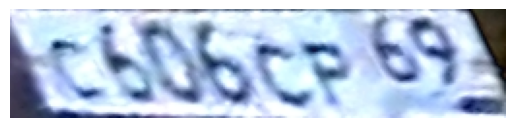

---------------------------------------------------------------------
PyTesseract:   

Ket
 ;  Время обнаружения символов: 0.19 сек.
---------------------------------------------------------------------
EasyOCR:  coecf 69 ;  Время обнаружения символов: 0.40 сек.
---------------------------------------------------------------------
PaddleOCR:  c606cp69 ;  Время обнаружения символов: 0.10 сек.
---------------------------------------------------------------------
YOLO: 606CP69 ;  Время обнаружения символов: 0.13 сек.
---------------------------------------------------------------------


In [84]:
#@title # Выберем изображение и распознаем его символы
# Загрузка изображения из файла
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
img = Image.open(image_path)

# Преобразуем изображение в формат, который понимает OpenCV
img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
# Отображаем изображение
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')


# PyTesseract
# Устанавливаем белый список символов для распознавания
whitelist = "0123456789ABCEHKMOPTXYabcehkmoptyx"
start_time = time.time()
# Распознаем текст с изображения с указанным белым списком символов
custom_config = f'-c tessedit_char_whitelist={whitelist}'
text = pytesseract.image_to_string(img, config=custom_config)
end_time = time.time()
processing_time_PyTesseract = end_time - start_time
clear_output()

# EasyOCR
start_time = time.time()
results_easyOCR = reader.readtext(img)
end_time = time.time()
processing_time_easy = end_time - start_time
clear_output()
# Распознавание PaddleOCR
start_time = time.time()
result = ocr.ocr(image_path, cls=True)
# Извлечение текста и объединение его в одну строку
extracted_text = ''.join([element[1][0] for element in result[0]])
end_time = time.time()
processing_time_paddle = end_time - start_time
clear_output()

# YOLO
start_time = time.time()
results = model_char(img)
char_results = []
for r in results:
    if r.boxes is None:
        continue
    for box in r.boxes:
        bbox = box.xyxy[0].cpu().numpy().astype(int)
        cls = int(box.cls[0].item())
        char_results.append((bbox, cls))

char_results = sorted(char_results, key=lambda x: x[0][0])
end_time = time.time()
processing_time_yolo = end_time - start_time
pred_texts = ''.join(letters[cls] for _, cls in char_results)

clear_output()
plt.show()
# Вывод значений
print("---------------------------------------------------------------------")
print("PyTesseract: ",text,"; " ,f"Время обнаружения символов: {processing_time_PyTesseract:.2f} сек.")
print("---------------------------------------------------------------------")
print("EasyOCR: " ,results_easyOCR[0][1],";  " f"Время обнаружения символов: {processing_time_easy:.2f} сек.")
print("---------------------------------------------------------------------")
print("PaddleOCR: ",extracted_text, ";  " f"Время обнаружения символов: {processing_time_paddle:.2f} сек.")
print("---------------------------------------------------------------------")
print("YOLO:", pred_texts,";  " f"Время обнаружения символов: {processing_time_yolo:.2f} сек.")
print("---------------------------------------------------------------------")